In [21]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns

Класи присутні в датасеті:

In [22]:
dataset_path = 'raw-img'
class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]
print(f"Знайдено класи: {class_folders}")

Знайдено класи: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


Кількість зображень на кожен клас:

In [23]:
class_stats = {}
image_formats = set()
image_sizes = []

for class_name in class_folders:
    class_path = os.path.join(dataset_path, class_name)
    
    images = [img for img in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, img))]
    class_stats[class_name] = len(images)
    
    for img_name in images[:5]:
        img_path = os.path.join(class_path, img_name)
        image_formats.add(os.path.splitext(img_name)[1])
        
        try:
            with Image.open(img_path) as img:
                image_sizes.append(img.size)
        except Exception as e:
            print(f"Помилка при відкритті {img_path}: {e}")

print("\nСтатистика за класами:")
for class_name, count in class_stats.items():
    print(f"{class_name}: {count} зображень")

print(f"\nФормати зображень: {image_formats}")


Статистика за класами:
cane: 4863 зображень
cavallo: 2623 зображень
elefante: 1446 зображень
farfalla: 2112 зображень
gallina: 3098 зображень
gatto: 1668 зображень
mucca: 1866 зображень
pecora: 1820 зображень
ragno: 4821 зображень
scoiattolo: 1862 зображень

Формати зображень: {'.jpeg', '.jpg'}


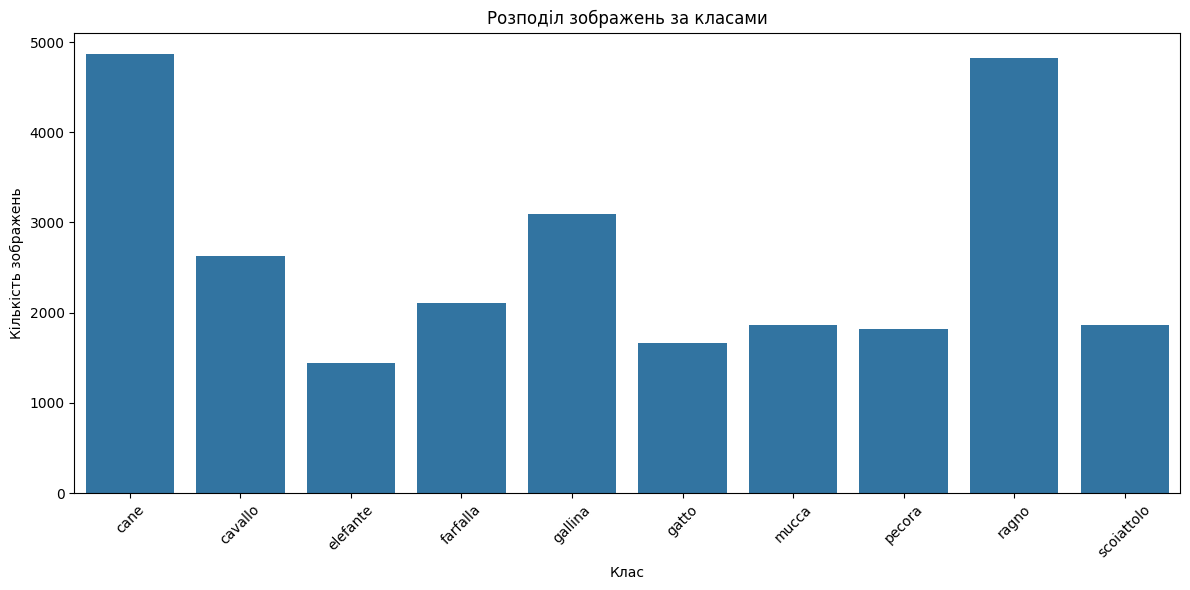

In [24]:
# Візуалізація розподілу класів
plt.figure(figsize=(12, 6))
sns.barplot(x=list(class_stats.keys()), y=list(class_stats.values()))
plt.title('Розподіл зображень за класами')
plt.xlabel('Клас')
plt.ylabel('Кількість зображень')
plt.xticks(rotation=45)
plt.tight_layout()

Розмірність зображень: 

In [25]:
if image_sizes:
    widths, heights = zip(*image_sizes)
    print(f"\nРозміри зображень:")
    print(f"Мінімальна ширина: {min(widths)}, Максимальна ширина: {max(widths)}")
    print(f"Мінімальна висота: {min(heights)}, Максимальна висота: {max(heights)}")


Розміри зображень:
Мінімальна ширина: 150, Максимальна ширина: 640
Мінімальна висота: 150, Максимальна висота: 640


Приклади зображень з кожного класу:

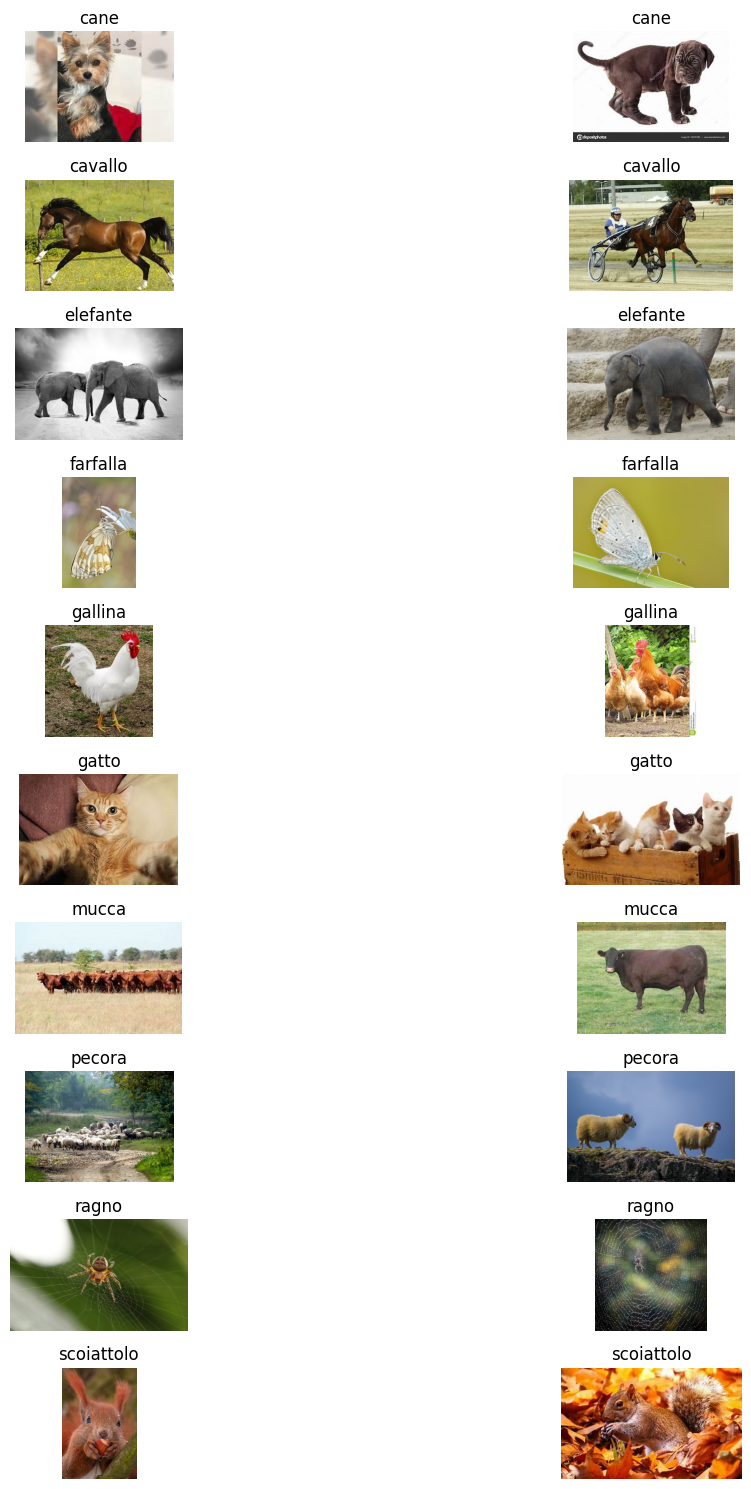

In [26]:
plt.figure(figsize=(15, 15))
num_classes = len(class_folders)
num_examples = 2  # Кількість прикладів з кожного класу

for i, class_name in enumerate(class_folders):
    class_path = os.path.join(dataset_path, class_name)
    images = [img for img in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, img))]
    
    for j in range(num_examples):
        if j < len(images):
            img_path = os.path.join(class_path, images[j])
            img = Image.open(img_path).convert('RGB')
            
            plt.subplot(num_classes, num_examples, i*num_examples + j + 1)
            plt.imshow(img)
            plt.title(f"{class_name}")
            plt.axis('off')

plt.tight_layout()

Аналіз збалансованості датасету: 


Аналіз збалансованості класів:
cane: 4863 зображень (18.58%)
cavallo: 2623 зображень (10.02%)
elefante: 1446 зображень (5.52%)
farfalla: 2112 зображень (8.07%)
gallina: 3098 зображень (11.83%)
gatto: 1668 зображень (6.37%)
mucca: 1866 зображень (7.13%)
pecora: 1820 зображень (6.95%)
ragno: 4821 зображень (18.42%)
scoiattolo: 1862 зображень (7.11%)


(np.float64(-1.0999999196741266),
 np.float64(1.0999999483475429),
 np.float64(-1.0999997478953014),
 np.float64(1.0999999879950144))

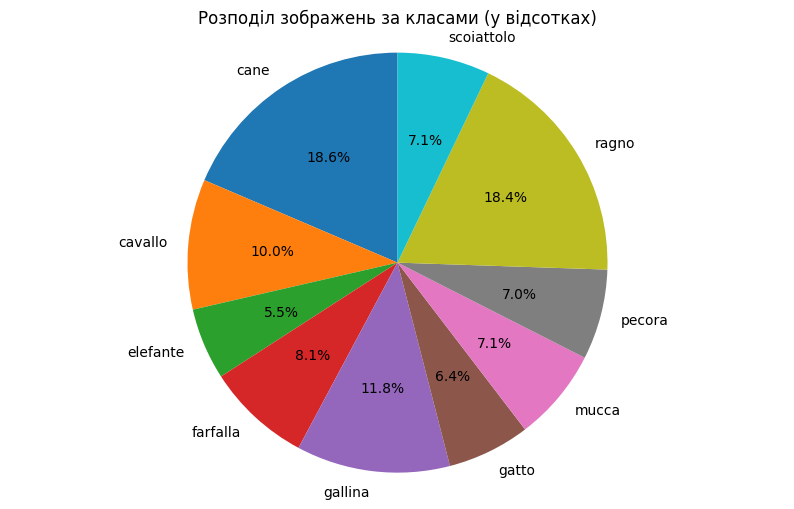

In [27]:
total_images = sum(class_stats.values())
print("\nАналіз збалансованості класів:")
for class_name, count in class_stats.items():
    percentage = (count / total_images) * 100
    print(f"{class_name}: {count} зображень ({percentage:.2f}%)")

plt.figure(figsize=(10, 6))
plt.pie(class_stats.values(), labels=class_stats.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Розподіл зображень за класами (у відсотках)')
plt.axis('equal')

**Висоновок:**

Класи в датасеті розподілені нерівномірно. Найбільше зображень у класах cane і ragno 18%, тоді як elefante 5% та gatto 6% мають значно менше прикладів. Дисбаланс буде впливати на навчання моделі, потребує уваги під час data preparation. Також зображення мають різну розмірність теж потребує уваги.